In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv("Bengaluru_House_Data.csv")

In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.shape

NameError: name 'df' is not defined

In [4]:
df['area_type'].unique() #bunlar benim için bir şey ifade etmiyor

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [2]:
# gereksiz kolonları temizle
df = df.drop(['area_type','availability','society'],axis='columns')
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df.isna().sum() #aksiyon almak siziz tercihinizde doldurmak veya boşaltmak

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [3]:
df["balcony"]=df["balcony"].fillna(df["balcony"].mean())

In [4]:
df=df.dropna(subset=["bath","location","total_sqft"]) #birden fazla kolon silemede yardımcı olur

In [18]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
#sizelara baktığımızda metinsel değerler de var machine bunu istemez ya encode etmemiz gerek ya sayısal kısmı ayrıştırıp
#size kaldırmamız gerek
"meric s3".split(" ")

['meric', 's3']

In [16]:
"meric 3".split(" ")[1]

'3'

In [17]:
int("meric 3".split(" ")[1])

3

In [5]:
df["oda"]=df["size"].apply(lambda x:int(x.split(" ")[0]))

In [41]:
df.head()

,location,size,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [6]:
#şimdi size silebilirim
df=df.drop(["size"],axis=1)

In [21]:
df

,location,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,1056,2.0,1.000000,39.07,2
1,Chikka Tirupathi,2600,5.0,3.000000,120.00,4
2,Uttarahalli,1440,2.0,3.000000,62.00,3
3,Lingadheeranahalli,1521,3.0,1.000000,95.00,3
4,Kothanur,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.000000,231.00,5
13316,Richards Town,3600,5.0,1.584376,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.000000,60.00,2
13318,Padmanabhanagar,4689,4.0,1.000000,488.00,4


In [46]:
df.shape

(13246, 6)

In [11]:
df.oda.unique()#tr de 43 27 li oda olması çok zor bi de aşırı aşırı pahalı olur
#veri setinde gürültü olabilir

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [7]:
df["oda"]=df[df.oda <= 20] #bu silmeyi dönecez bi ara

ValueError: Columns must be same length as key

In [8]:
print(df.dtypes)

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
oda             int64
dtype: object


In [9]:
df["total_sqft"].unique() #1133-1384 görüdğünü üzere string değer ve ara ara böyle 
#bu değerleri çıkarmam gerek

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def sayimi(x):#dene yanıl uygulayacağız
    try:
        float(x)
    except:
        return False
    return True
#eğer x sayıysa 1 se mesela float yapmaya çalış yapıldıysa return true döndür 
#yapılamazsa false 


In [11]:
df2=df[df["total_sqft"].apply(sayimi)==False]#sonuç true veya false göre dönecek buradan da falseleri çekecez
df2.head()

,location,total_sqft,bath,balcony,price,oda
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2


In [12]:
nonn=df["total_sqft"].apply(lambda x: not sayimi(x))
df3=df[nonn]
print("Sayısal olmayan değerler:")
print(df3)

Sayısal olmayan değerler:
                 location   total_sqft  bath  balcony    price  oda
30              Yelahanka  2100 - 2850   4.0      0.0  186.000    4
122                Hebbal  3067 - 8156   4.0      0.0  477.000    4
137    8th Phase JP Nagar  1042 - 1105   2.0      0.0   54.005    2
165              Sarjapur  1145 - 1340   2.0      0.0   43.490    2
188              KR Puram  1015 - 1540   2.0      0.0   56.800    2
...                   ...          ...   ...      ...      ...  ...
12975          Whitefield   850 - 1060   2.0      0.0   38.190    2
12990      Talaghattapura  1804 - 2273   3.0      0.0  122.000    3
13059              Harlur  1200 - 1470   2.0      0.0   72.760    2
13265               Hoodi  1133 - 1384   2.0      0.0   59.135    2
13299          Whitefield  2830 - 2882   5.0      0.0  154.500    4

[190 rows x 6 columns]


In [13]:
print("Sayısal olan değerler:")
print(df[df['total_sqft'].apply(sayimi)].head())

print("Sayısal olmayan değerler:")
print(df[~df['total_sqft'].apply(sayimi)].head())

Sayısal olan değerler:
                   location total_sqft  bath  balcony   price  oda
0  Electronic City Phase II       1056   2.0      1.0   39.07    2
1          Chikka Tirupathi       2600   5.0      3.0  120.00    4
2               Uttarahalli       1440   2.0      3.0   62.00    3
3        Lingadheeranahalli       1521   3.0      1.0   95.00    3
4                  Kothanur       1200   2.0      1.0   51.00    2
Sayısal olmayan değerler:
               location   total_sqft  bath  balcony    price  oda
30            Yelahanka  2100 - 2850   4.0      0.0  186.000    4
122              Hebbal  3067 - 8156   4.0      0.0  477.000    4
137  8th Phase JP Nagar  1042 - 1105   2.0      0.0   54.005    2
165            Sarjapur  1145 - 1340   2.0      0.0   43.490    2
188            KR Puram  1015 - 1540   2.0      0.0   56.800    2


In [14]:
df2[df2['total_sqft'].str.contains("Meter")]

,location,total_sqft,bath,balcony,price,oda
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.50,1
775,Basavanagara,1000Sq. Meter,2.0,1.0,93.00,1
1400,Chamrajpet,716Sq. Meter,9.0,1.0,296.00,9
1712,Singena Agrahara,1500Sq. Meter,3.0,1.0,95.00,3
1743,Hosa Road,142.61Sq. Meter,3.0,1.0,115.00,3
3228,Dodda Banaswadi,3040Sq. Meter,5.0,1.0,140.00,5
4113,BTM Layout,167Sq. Meter,3.0,2.0,10.00,3
5631,Thanisandra,204Sq. Meter,4.0,2.0,185.00,3
5976,1st Phase JP Nagar,78.03Sq. Meter,1.0,1.0,63.00,1
6303,JP Nagar,84.53Sq. Meter,3.0,1.0,69.34,3


In [15]:
#bu değerleri çıkarmak yerine 2100 - 1200 olsun aradaki - sileceğim ve 2100 ile 1200 le toplayıp 2 ye böleyim ortalamsını
#yerleştrime aksiyonunu aldım
def duzenli(x):
    token=str(x).split("-")
    if len(token)==2:
        res=(float(token[0])+float(token[1]))/2
    else:
        try:
            res=float(x)
        except:
            res=None
    return res

In [16]:
df["total_sqft"]=df["total_sqft"].apply(duzenli)

In [17]:
for i in df["total_sqft"]:
    print(i)

1056.0
2600.0
1440.0
1521.0
1200.0
1170.0
2732.0
3300.0
1310.0
1020.0
1800.0
2785.0
1000.0
1100.0
2250.0
1175.0
1180.0
1540.0
2770.0
1100.0
600.0
1755.0
2800.0
1767.0
510.0
1250.0
660.0
1610.0
1151.0
1025.0
2475.0
1075.0
1760.0
1693.0
1925.0
700.0
1070.0
1724.0
1290.0
1143.0
1296.0
1254.0
600.0
660.0
1330.74
600.0
970.0
1459.0
800.0
869.0
1270.0
1670.0
2010.0
1185.0
1600.0
1200.0
1500.0
1407.0
840.0
4395.0
845.0
5700.0
1160.0
3000.0
1100.0
1140.0
1220.0
1350.0
1005.0
500.0
1358.0
1569.0
1240.0
2089.0
1206.0
1150.0
2511.0
460.0
4400.0
1660.0
1326.0
1325.0
1499.0
3000.0
1665.0
708.0
1060.0
710.0
1000.0
1000.0
1450.0
1200.0
1296.0
1540.0
2894.0
1330.0
1200.0
1200.0
2502.0
650.0
2400.0
1007.0
1200.0
966.0
1630.0
1640.0
782.0
1260.0
1800.0
1413.0
1116.0
1530.0
3700.0
2497.0
1540.0
1436.0
1100.0
276.0
1427.0
2061.0
5611.5
2650.0
1282.0
1050.0
1600.0
945.0
1500.0
950.0
1870.0
1600.0
880.0
1200.0
1535.0
950.0
1360.0
1073.5
1280.0
1260.0
5000.0
3050.0
1563.05
1000.0
1167.0
4000.0
1828.0
890.0
1

In [24]:
df["total_sqft"].isnull().sum()

46

In [18]:
df = df.dropna()

In [44]:
df.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
oda           0
dtype: int64

In [26]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [27]:
#feature eng yapılır yani kolonlarda işlemler 
df.head()#squarefoot değilde metre kareye çevirelim 
#1 sqft 0.092903 metre kare eder

,location,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [19]:
df["metrekare"]=df["total_sqft"]*0.092903
df["metrekare"]

C:\Users\meric\AppData\Local\Temp\ipykernel_16724\561094556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["metrekare"]=df["total_sqft"]*0.092903


0         98.105568
1        241.547800
2        133.780320
3        141.305463
4        111.483600
            ...    
13315    320.794059
13316    334.450800
13317    106.002323
13318    435.622167
13319     51.096650
Name: metrekare, Length: 13200, dtype: float64

In [48]:
df.head()

,location,total_sqft,bath,balcony,price,oda,metrekare
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,98.105568
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,241.547800
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,133.780320
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,141.305463
4,Kothanur,1200.0,2.0,1.0,51.00,2,111.483600


In [20]:
#her metrekare başına fiyat bulmak gerek birim metre başına fiyat   direkt price 1000le çarpıyorum işimiz rahatlasın
df["pricemkr2"]=df["price"]*1000/df["metrekare"]

C:\Users\meric\AppData\Local\Temp\ipykernel_16724\1473434785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pricemkr2"]=df["price"]*1000/df["metrekare"]


In [50]:
df  #yani bunu başka yerlerde kullancağız şidmilik kalsın

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
0,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,98.105568,398.244471
1,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,241.547800,496.796079
2,Uttarahalli,1440.0,2.0,3.000000,62.00,3,133.780320,463.446342
3,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,141.305463,672.302386
4,Kothanur,1200.0,2.0,1.000000,51.00,2,111.483600,457.466390
...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.000000,231.00,5,320.794059,720.088149
13316,Richards Town,3600.0,5.0,1.584376,400.00,4,334.450800,1195.990561
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.000000,60.00,2,106.002323,566.025331
13318,Padmanabhanagar,4689.0,4.0,1.000000,488.00,4,435.622167,1120.236840


In [56]:
#şimdi location kısmına bakalım
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [30]:
len(df.location.unique()) #1298 tane eşsiz farklı değer var ama şöyle bir şey var insanlık hali kayıt ederken şu şekil
#Kothanur 
#Whitefield diye yazıldı diyelim birisinin sonunda yanlışlukla boşluk var whitefield ile (whitefield )farklı sayılır bunu
#önlememiz gerek bu da strip ile sondaki boşluğu silmeyle olur

1298

In [31]:
df.location=df["location"].apply(lambda x:x.strip())

C:\Users\meric\AppData\Local\Temp\ipykernel_15464\2790390876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location=df["location"].apply(lambda x:x.strip())


In [59]:
len(df.location.unique()) #göründüğü gibi 12 tane öyle yanlışlığı önledikl

1287

In [21]:
loc_stats=df.groupby(["location"]).size().reset_index(name="count").sort_values("count",ascending=False)

In [33]:
loc_stats

,location,count
1233,Whitefield,533
1020,Sarjapur Road,392
400,Electronic City,304
646,Kanakpura Road,264
1129,Thanisandra,235
...,...,...
1,1 Giri Nagar,1
644,"Kanakapura Road,",1
645,Kanakapura main Road,1
648,Kannur,1


In [79]:
loc_stats.count()

location    1287
count       1287
dtype: int64

In [22]:
loc_statse = df.groupby(['location'])['location'].size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)
loc_statse

,location,counts
1246,Whitefield,532
1033,Sarjapur Road,392
414,Electronic City,302
660,Kanakpura Road,264
1142,Thanisandra,232
...,...,...
1,Banaswadi,1
652,Kanakadasa Layout,1
653,Kanakapur main road,1
655,Kanakapura Rod,1


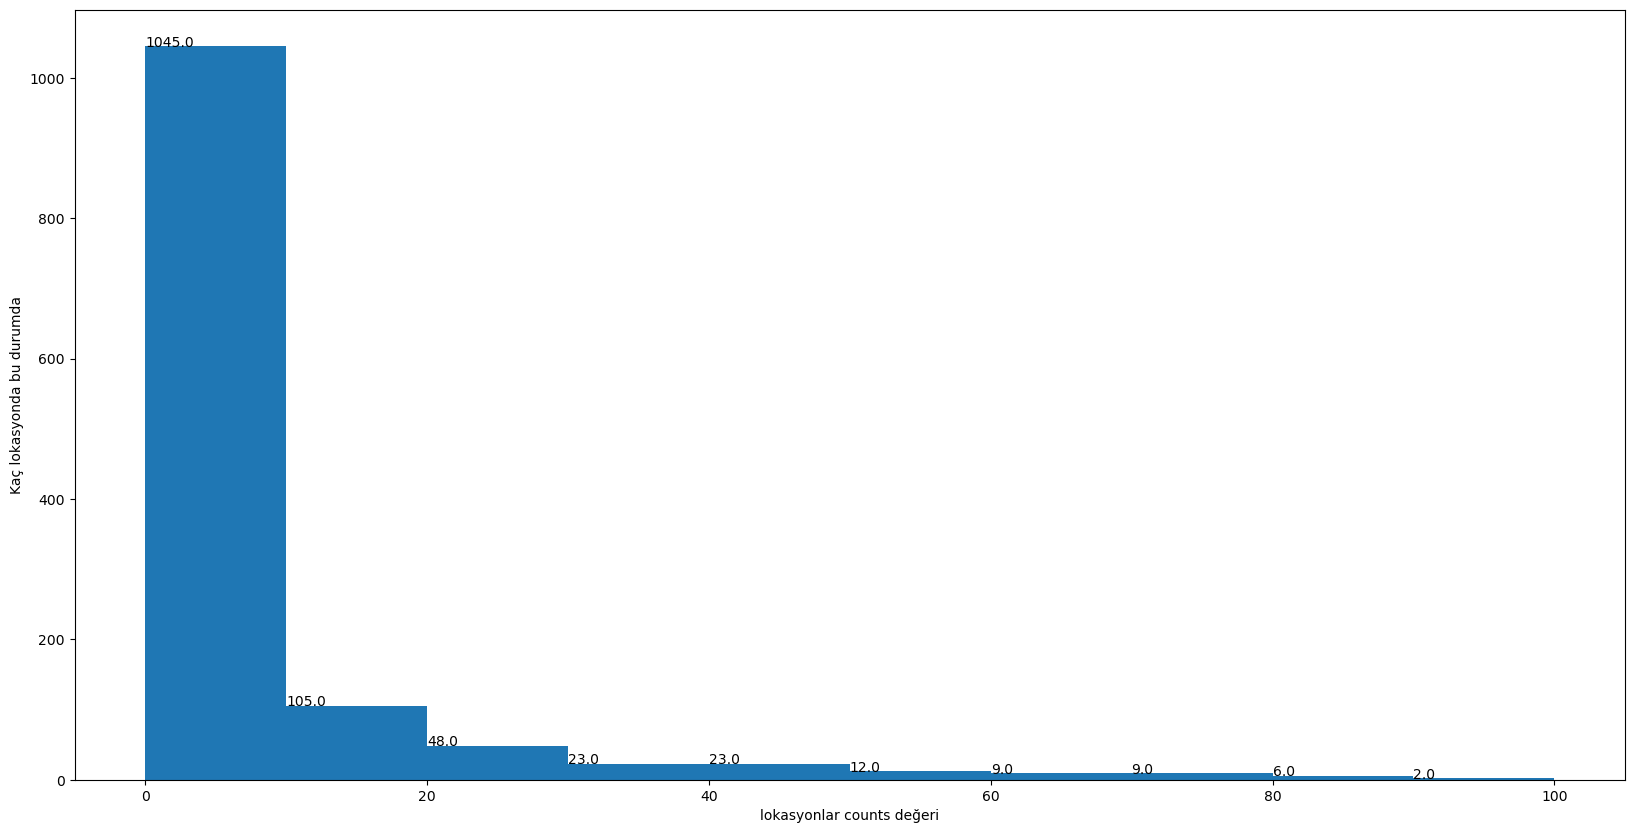

In [23]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

plt.xlabel("lokasyonlar counts değeri")
plt.ylabel("Kaç lokasyonda bu durumda")

bins = 10
data = loc_statse.counts
arr = plt.hist(data, bins=bins, range=(0,100))
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
    """for i in range(bins):

bins sayısı kadar (bu durumda 10) döngü çalışır.
i değişkeni, 0'dan başlayarak bins - 1'e kadar olan değerleri alır.
plt.text(arr[1][i], arr[0][i], str(arr[0][i]))

plt.text(x, y, s) fonksiyonu, grafikteki (x, y) koordinatlarına s stringini yazdırır.
arr değişkeni plt.hist fonksiyonunun döndürdüğü üç parçalı bir tuple'dır:
arr[0]: Her barın yüksekliği, yani her bir bin'deki değer sayısı.
arr[1]: Histogramın bin sınırlarını içeren bir liste.
arr[2]: Histogramın patches (bar) nesneleri (bu durumda kullanmadık).
plt.text(arr[1][i], arr[0][i], str(arr[0][i])) şu anlamlara gelir:

arr[1][i]: Bin'in sol sınırındaki x koordinatı. Barın sol sınırına metin yazmak anlamına gelir.
arr[0][i]: Bin'deki değerlerin sayısı (barın yüksekliği). Bu, y koordinatını belirler.
str(arr[0][i]): Bu değeri stringe çevirir ve metin olarak yazar."""
#ve görüldüğü üzere 0 ile 10 arasında o kadar çok değer varki (1033)aslında bunları ötekileştirip farklı veri grubuna alabilirim


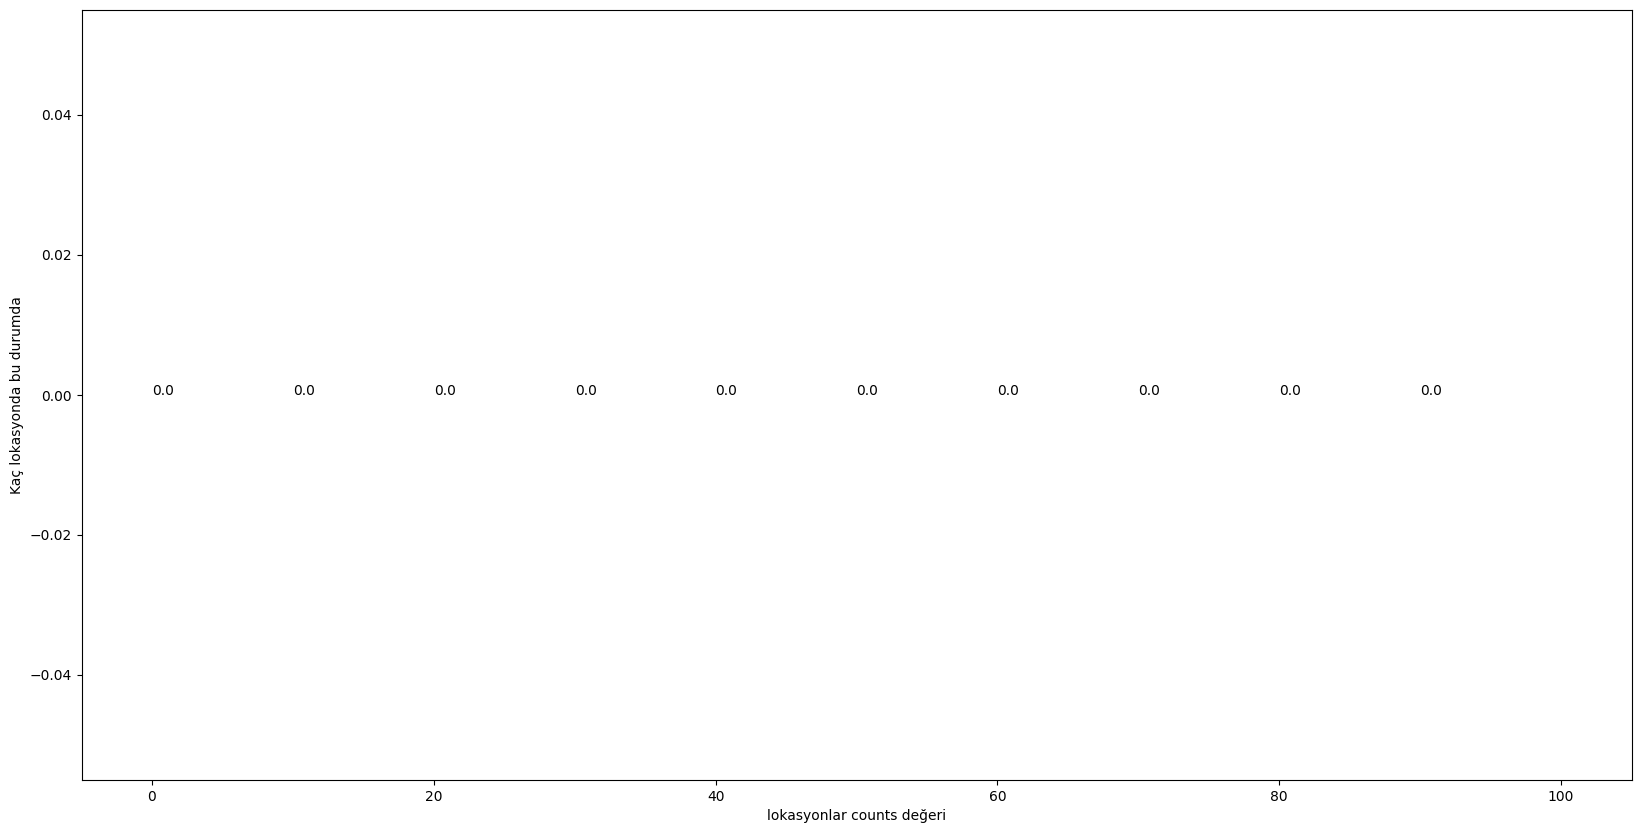

In [84]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

plt.xlabel("lokasyonlar counts değeri")
plt.ylabel("Kaç lokasyonda bu durumda")

bins = 10
data = loc_statse.count()
arr = plt.hist(data, bins=bins, range=(0,100))
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

In [24]:
less10th=loc_statse[loc_statse.counts<=10]
less10th

,location,counts
354,Dairy Circle,10
1016,Sadashiva Nagar,10
841,Nagappa Reddy Layout,10
639,Kalkere,10
840,Naganathapura,10
...,...,...
1,Banaswadi,1
652,Kanakadasa Layout,1
653,Kanakapur main road,1
655,Kanakapura Rod,1


In [25]:
less10th.location.to_list() #şu şekil metin içersinde yani liste içinde gösterebilirim

['Dairy Circle',
 'Sadashiva Nagar',
 'Nagappa Reddy Layout',
 'Kalkere',
 'Naganathapura',
 '1st Block Koramangala',
 'BTM 1st Stage',
 'Gunjur Palya',
 'Ganga Nagar',
 'Nagadevanahalli',
 'Dodsworth Layout',
 'Thyagaraja Nagar',
 'Basapura',
 'Kamakshipalya',
 'Sector 1 HSR Layout',
 'Vishwanatha Nagenahalli',
 '4th Block Koramangala',
 'Ejipura',
 'Mathikere',
 '2nd Phase JP Nagar',
 'Chandra Layout',
 'Banagiri Nagar',
 'Chennammana Kere',
 'Peenya',
 'Gollahalli',
 'Vignana Nagar',
 'Yemlur',
 'Medahalli',
 'Richmond Town',
 'Jakkur Plantation',
 'B Narayanapura',
 'KUDLU MAIN ROAD',
 'Lingarajapuram',
 'Kaverappa Layout',
 'Ittamadu',
 'Hoysalanagar',
 'Cambridge Layout',
 'Volagerekallahalli',
 '1st Block HRBR Layout',
 'Manayata Tech Park',
 'Sidedahalli',
 'Dodda Nekkundi Extension',
 'Basavanapura',
 'Gopalkrishna Nagar',
 'Jalahalli West',
 'Vajarahalli',
 'Roopena Agrahara',
 'Nallurhalli',
 'Dollars Colony',
 'Reliaable Tranquil Layout',
 'Kanaka Nagar',
 'Byadarahalli',
 

In [26]:
df.location=df.location.apply(lambda x:"other" if x in less10th.location.to_list() else x)

C:\Users\meric\AppData\Local\Temp\ipykernel_16724\2052855824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location=df.location.apply(lambda x:"other" if x in less10th.location.to_list() else x)


In [27]:
df[df.location =='other']

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
9,other,1020.0,6.0,1.584376,370.00,6,94.761060,3904.557421
18,other,2770.0,4.0,2.000000,290.00,3,257.341310,1126.908074
19,other,1100.0,2.0,2.000000,48.00,2,102.193300,469.698111
24,other,510.0,1.0,0.000000,25.25,1,47.380530,532.919324
25,other,1250.0,3.0,2.000000,56.00,3,116.128750,482.223394
...,...,...,...,...,...,...,...,...
13291,other,812.0,1.0,0.000000,26.00,1,75.437236,344.657378
13292,other,1440.0,2.0,2.000000,63.93,3,133.780320,477.872979
13302,other,1075.0,2.0,2.000000,48.00,2,99.870725,480.621323
13306,other,1200.0,5.0,1.584376,325.00,4,111.483600,2915.226993


In [93]:
df.head(30)

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
0,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,98.105568,398.244471
1,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,241.547800,496.796079
2,Uttarahalli,1440.0,2.0,3.000000,62.00,3,133.780320,463.446342
3,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,141.305463,672.302386
4,Kothanur,1200.0,2.0,1.000000,51.00,2,111.483600,457.466390
5,Whitefield,1170.0,2.0,1.000000,38.00,2,108.696510,349.597241
6,Old Airport Road,2732.0,4.0,1.584376,204.00,4,253.810996,803.747683
7,Rajaji Nagar,3300.0,4.0,1.584376,600.00,4,306.579900,1957.075464
8,Marathahalli,1310.0,3.0,1.000000,63.25,3,121.702930,519.708112
9,other,1020.0,6.0,1.584376,370.00,6,94.761060,3904.557421


In [94]:
len(df.location.unique())

241

In [96]:
241 / 1265

0.19051383399209487

In [28]:
df[df.metrekare<30]

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
119,Hennur Road,276.0,3.0,3.000000,23.00,2,25.641228,8.969929e+02
349,other,11.0,3.0,2.000000,74.00,3,1.021933,7.241179e+04
992,Rajaji Nagar,315.0,4.0,2.000000,90.00,4,29.264445,3.075404e+03
1020,other,15.0,1.0,0.000000,30.00,1,1.393545,2.152783e+04
1122,other,24.0,2.0,2.000000,150.00,5,2.229672,6.727447e+04
2486,other,296.0,1.0,0.000000,22.89,1,27.499288,8.323852e+02
4086,Sarjapur Road,1.0,4.0,1.584376,120.00,4,0.092903,1.291670e+06
4853,Nagarbhavi,300.0,1.0,1.000000,20.00,1,27.870900,7.175943e+02
4972,other,5.0,7.0,3.000000,115.00,7,0.464515,2.475700e+05
5970,Mysore Road,45.0,1.0,0.000000,23.00,1,4.180635,5.501557e+03


In [103]:
df.shape

(13200, 8)

In [29]:
#şimdi projeye başladığında bi kolonları gözden geçir bu kolon neymiş ne değilmiş
#totalsqft mesele bilmiyordum metrekarenin farklı birime çevrilmiş haliymiş
#metre kareye çevirdim ve düşündümki ve gördümki e oda da elimde var odayı da ayrıştırdım hbklardan falan
#ulan 3 odalı aynı özellikli oda ile 2 odalı aynı özellikli oda aynı fiyatta ve 
#metre kareye çevirme işlemi yapmamın nedeni daha iyi analiz edebilmek çevirmek marifet değil çevrdikten sonra bununşa
#analiz yapabilmek önemlidir mesela oda sayısı 3  metre karesi 1 olan veya oda sayısı 4 metre karesi 5 olan değerler var
#bu mümkün olabilir mi ya  bunları çıkarmamız gerekiyor 
#df = df[~(df['total_sqft']/df['oda']<300)]
df = df[df.apply(lambda x: x['total_sqft'] / x['oda'] >= 300, axis=1)]

In [106]:
df.shape #bu şekil çıkarmış olduk

(12456, 8)

In [108]:
#elimde metre kareye düşen birim fiyat var 
df.pricemkr2.describe()#göründüğü gibi en düşük fiyat 20 en yüksek 19000 bin ve ortlaması 679 yani max değer 
#ciddi ayrışıyor bu yüzden bi eşik değer koymam gerekiyor 


count    12456.000000
mean       679.041885
std        448.653686
min         28.828974
25%        453.217476
50%        569.854326
75%        744.504124
max      18995.144208
Name: pricemkr2, dtype: float64

In [35]:
#her lokasyondaki yani bölgedeki ilçedeki fiyatların ortlaması aynı değil atıyorum nilüfer ile gürsü birisi 500 tl birisi 90tl
def esikdeger(df): #bu yüzden groupby location dedim bu lokasyon lokasyon eşik değerlere ayıracak
    df_out=pd.DataFrame()#mesela nilüferin eşik değeri min 400 max 700ken  gürsünün 70tl ye 150 tl olsun böyle ayırıyoruz
    for key,subdf in df.groupby("location"):
        lower_limit = subdf.pricemkr2.mean() - ( 1 * subdf.pricemkr2.std() ) #her 1 i 2 3 yaptığımda eşik değeri azaltıyoz
        #yani daha fazla alan dışarıda kalıyor daha fazla yer alıyoruz
        upper_limit = subdf.pricemkr2.mean() + ( 1 * subdf.pricemkr2.std() )
        
        reduced_df = subdf[(subdf.pricemkr2>lower_limit) & (subdf.pricemkr2<upper_limit)]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    
    return df_out

In [36]:
df3=esikdeger(df)
df3

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
0,Devarachikkanahalli,1250.0,2.0,3.000000,44.00,3,116.128750,378.889810
1,Devarachikkanahalli,1250.0,2.0,2.000000,40.00,2,116.128750,344.445282
2,Devarachikkanahalli,1200.0,2.0,2.000000,83.00,2,111.483600,744.504124
3,Devarachikkanahalli,1170.0,2.0,2.000000,40.00,2,108.696510,367.997096
4,Devarachikkanahalli,1425.0,2.0,2.000000,65.00,3,132.386775,490.985599
...,...,...,...,...,...,...,...,...
10290,other,1353.0,2.0,2.000000,110.00,2,125.697759,875.115045
10291,other,812.0,1.0,0.000000,26.00,1,75.437236,344.657378
10292,other,1440.0,2.0,2.000000,63.93,3,133.780320,477.872979
10293,other,1075.0,2.0,2.000000,48.00,2,99.870725,480.621323


In [37]:
df3.shape

(10295, 8)

In [49]:
def samegr(df,loc):
    bhk2=df[(df.location==loc)  & (df.oda==2)]
    bhk3=df[(df.location==loc)  & (df.oda==3)]
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(loc)
    plt.legend()

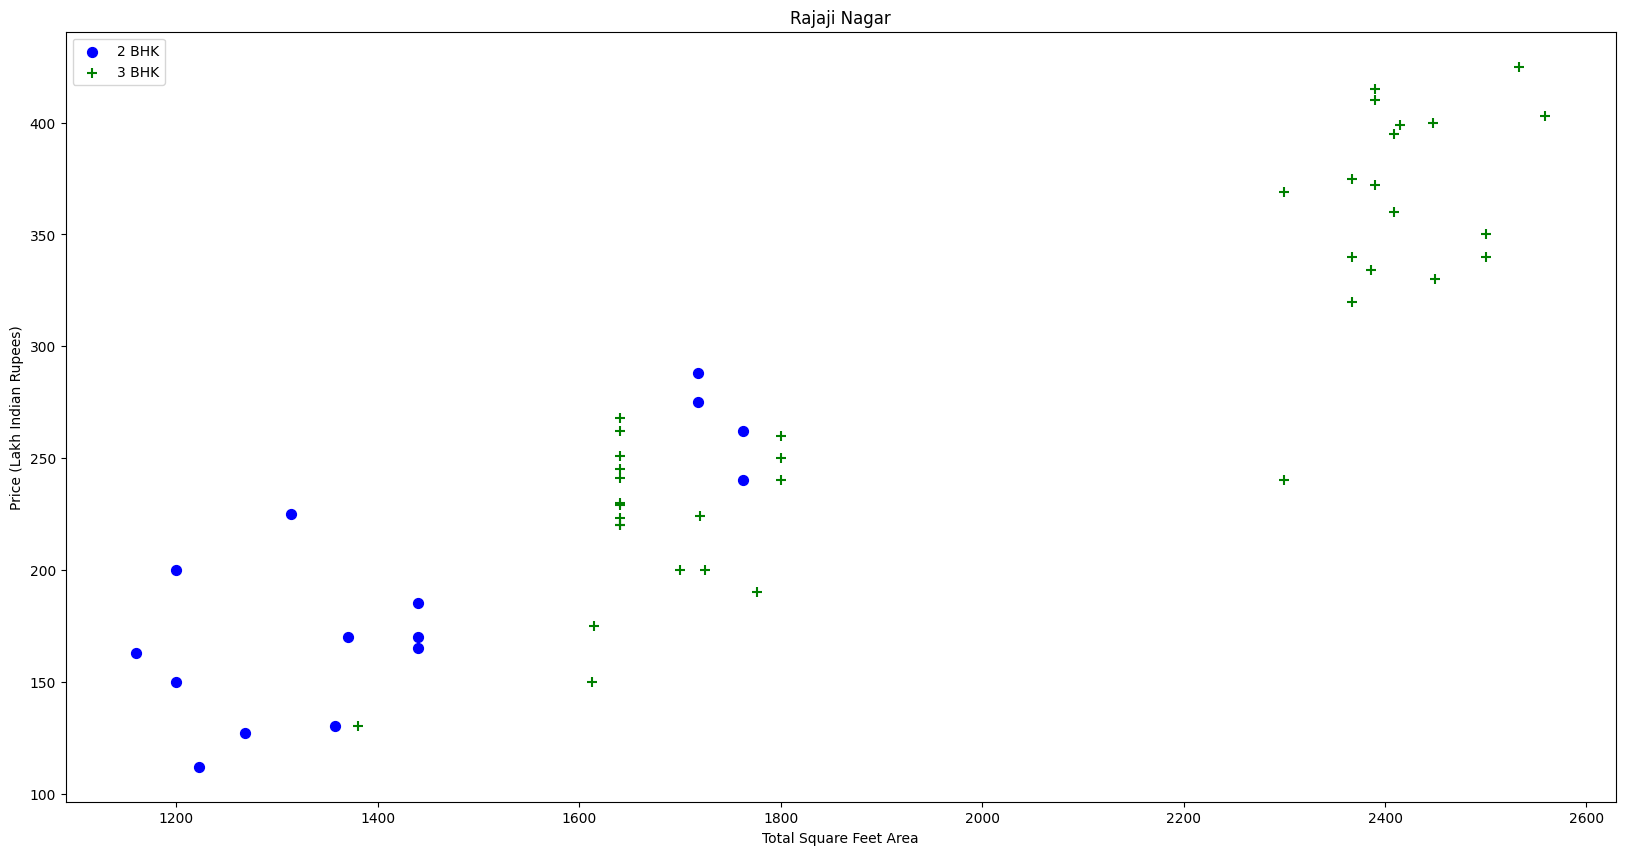

In [48]:
samegr(df3,"Rajaji Nagar")
#göründüğü üzere oda sayısı 2 olup sol altta fiyatları az olanlar ve oda sayısı 3 olup fiyatları yüksek olanlar var ancak
#ortada oda sayıları farklı fiyatlar benzer olanlar da var sıkıntı

In [ ]:
""""{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}""""

In [45]:
#her lokasyonun yani her ilçenin oda sayısına göre ortalama standart spama vb . şeyleri getir
def detailedinf(df):
    safdisiindis=np.array([])
    for loc,loc_df in df.groupby("location"):#mesela şişliye göre  (tek tek lokasyonları gezecek)
        odastats={}
        for room,room_df in loc_df.groupby("oda"):#şişlideki oda sayısına göre işlem yapar ilk şişli oda sayısı 2 olana gezer
#sonra şişli 3 gezer sonra sarıyer 2 sarıyer 3 ....
            odastats[room]={#oda statse ekle dictinary olarak
               'mean': np.mean(room_df.pricemkr2),
                'std': np.std(room_df.pricemkr2),
                'count': room_df.shape[0]#oda sayısı
            }
    for room,room_df in loc_df.groupby("oda"):
        stats = odastats.get(room-1)
        
        if stats and stats['count']>5:
                safdisiindis = np.append(safdisiindis, room_df[room_df.pricemkr2<(stats['mean'])].index.values)
    return df.drop(safdisiindis,axis='index')

In [38]:
df3.shape

(10295, 8)

In [46]:
df4=detailedinf(df3)

In [47]:
df4.shape

(9131, 8)

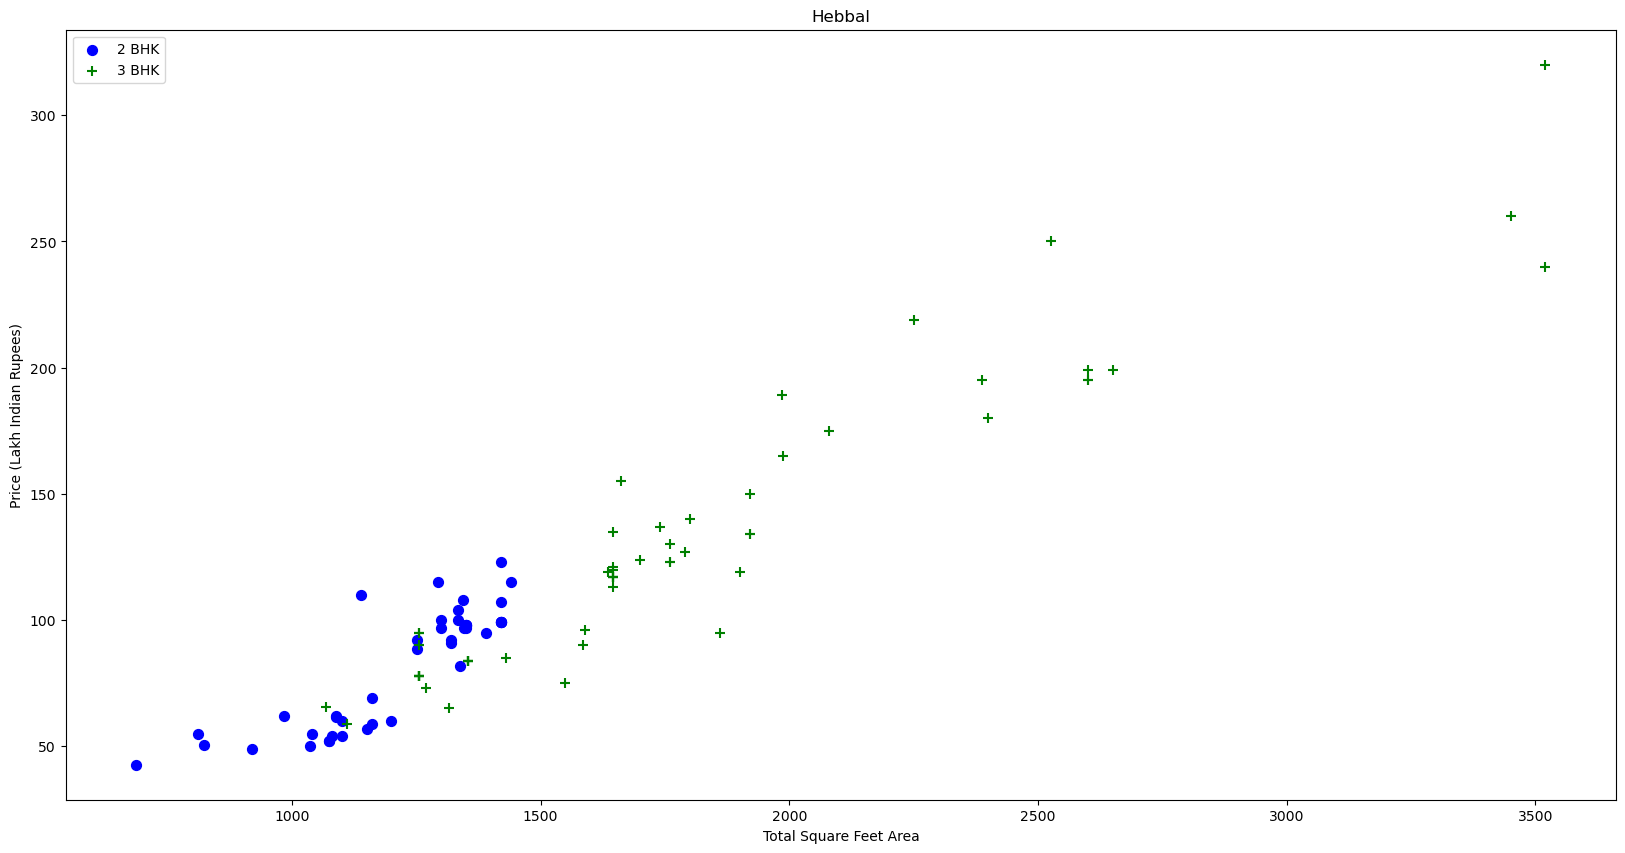

In [50]:
samegr(df4,"Hebbal")

Text(0, 0.5, 'Count')

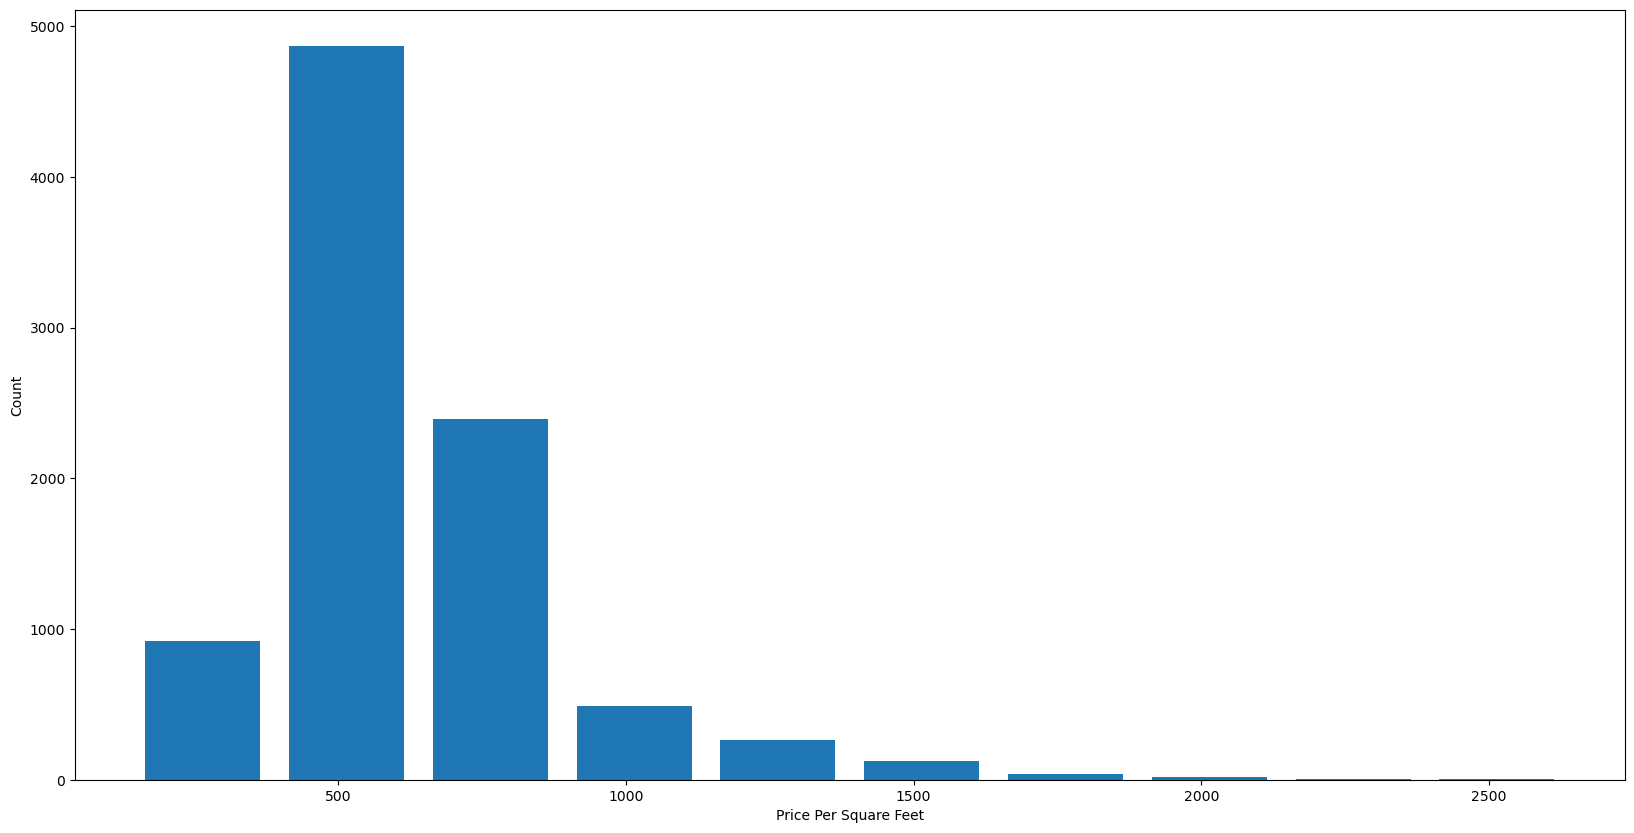

In [53]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.pricemkr2,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [54]:
df4.bath.unique()#13 16 12 banyo çok fazla ve banyo sayısı oda sayısından fazla olamaz 

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

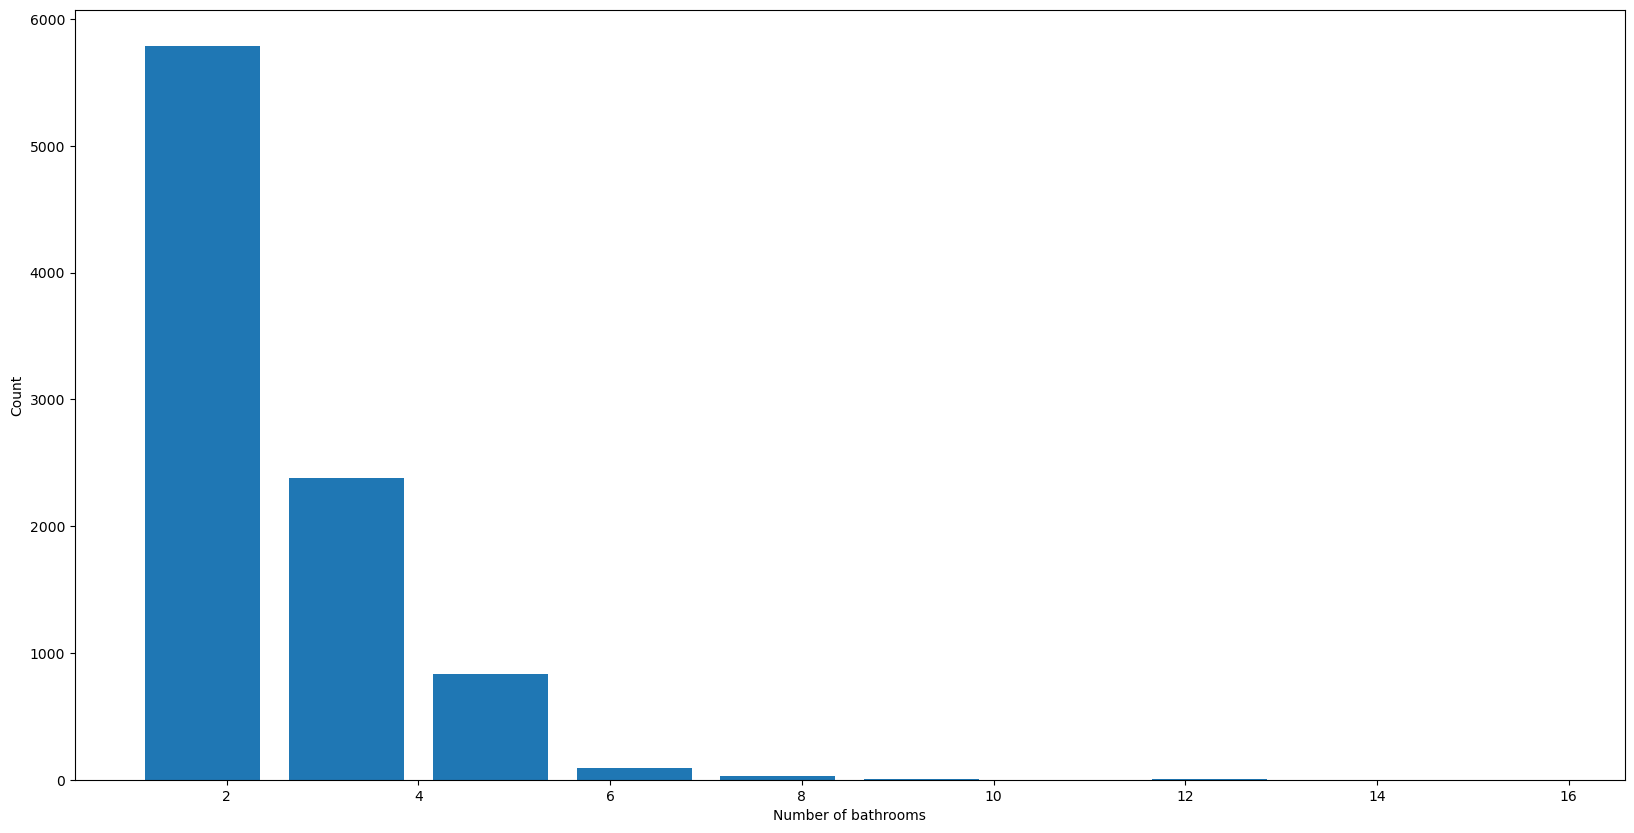

In [55]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [56]:
df4[df4.bath>10]

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
5306,Neeladri Nagar,4000.0,12.0,1.584376,160.0,10,371.612000,430.556602
8528,other,12000.0,12.0,1.584376,525.0,10,1114.836000,470.921283
8617,other,10000.0,16.0,1.584376,550.0,16,929.030000,592.015328
9357,other,6000.0,12.0,1.584376,150.0,11,557.418000,269.097876
9689,other,5425.0,13.0,0.000000,275.0,13,503.998775,545.636247


In [57]:
df4[df4.bath>df4.oda+2]

,location,total_sqft,bath,balcony,price,oda,metrekare,pricemkr2
1648,Chikkabanavar,2460.0,7.0,2.000000,80.0,4,228.541380,350.046018
5267,Nagasandra,7000.0,8.0,1.584376,450.0,4,650.321000,691.965968
6747,Thanisandra,1806.0,6.0,2.000000,116.0,3,167.782818,691.369959
8452,other,11338.0,9.0,1.000000,1000.0,6,1053.334214,949.366295


In [58]:
df5 = df4[df4.bath<df4.oda+2]
df5.shape

(9040, 8)

In [59]:
#şimdi model oluşturma zamanı ama bazı model eğitirken gereksiz görülen kolonlar olacak 
#pricemkr2  metrekare  balcony kolonları gereksiz  hepsi görevini tamamladı feature eng. de kullandık 
df6 = df5.drop(['balcony','pricemkr2','metrekare'],axis='columns')
df6.head(3)

,location,total_sqft,bath,price,oda
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2


In [60]:
df6.rename(columns={'oda': 'bhk'},inplace=True, errors='raise')
df6.head(3)

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2


In [61]:
df6.location=df.location.str.lower().str.strip()# tüm harfleri küçüğe çevirip sonda boşluk varsa sildirdim

In [62]:
df6.head()

,location,total_sqft,bath,price,bhk
0,electronic city phase ii,1250.0,2.0,44.0,3
1,chikka tirupathi,1250.0,2.0,40.0,2
2,uttarahalli,1200.0,2.0,83.0,2
3,lingadheeranahalli,1170.0,2.0,40.0,2
4,kothanur,1425.0,2.0,65.0,3


In [63]:
#Bu parametre, dummy değişkenlerin yaratılması sırasında ilk kategorinin atlanıp atlanmayacağını belirler.
#Bu, "dummy değişken tuzağı" adı verilen durumdan kaçınmak için yapılır. 
#Bu tuzak, modeldeki tüm kategorik değişkenlerin dahil edilmesi durumunda,
#değişkenlerin birbirleriyle tamamen ilişkili (lineer bağımlı) hale gelmesidir. 
#Bu, özellikle regresyon analizinde sorun yaratır çünkü modelin öğrenmesi zorlaşır. ss1079 
#a b c olsun ev a da ise 1 değilse 0 b ve c de de öyle a+b+c =1 olursa biri 1 diğerleri 0 olmak zorunda 
# bu durum bir tuzak oluşturur. Çünkü üç dummy değişken de toplamda bire eşit olacak şekilde birbirine bağımlıdır
#bu tuzaktan kaçınmanın basit bir yolu, bir kategoriyi referans olarak seçip onu modelden çıkarmaktır.
#Bu durumda, geri kalan dummy değişkenler birbirinden bağımsız olur ve model, eksik olan kategoriyi diğerlerine bakarak belirleyebilir.
#1 0 0  göründüğü üzere dummy var b yi çıkarsak veya herhangi birini çıkarsak sorun çözülür drop first true yapılabilir
#0 0 1    prefix ev desek   ev a ev b ev c  yapar prefix_sep (_) yapsak ev_a  ev_b ev_c yapar
#0 1 0  


In [64]:
df7 = pd.get_dummies(df6, drop_first=True, prefix='loc', prefix_sep='_')
df7.head()

,total_sqft,bath,price,bhk,loc_1st phase jp nagar,loc_2nd phase judicial layout,loc_2nd stage nagarbhavi,loc_5th block hbr layout,loc_5th phase jp nagar,loc_6th phase jp nagar,...,loc_vijayanagar,loc_vishveshwarya layout,loc_vishwapriya layout,loc_vittasandra,loc_whitefield,loc_yelachenahalli,loc_yelahanka,loc_yelahanka new town,loc_yelenahalli,loc_yeshwanthpur
0,1250.0,2.0,44.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = df7.drop(['price'],axis='columns')
X.head(3) #bağımsız değişkenim

,total_sqft,bath,bhk,loc_1st phase jp nagar,loc_2nd phase judicial layout,loc_2nd stage nagarbhavi,loc_5th block hbr layout,loc_5th phase jp nagar,loc_6th phase jp nagar,loc_7th phase jp nagar,...,loc_vijayanagar,loc_vishveshwarya layout,loc_vishwapriya layout,loc_vittasandra,loc_whitefield,loc_yelachenahalli,loc_yelahanka,loc_yelahanka new town,loc_yelenahalli,loc_yeshwanthpur
0,1250.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y=df7["price"]
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
#%80 i model eğitmek için veriliyor  model eğitiyor %20 lik kısımı model hiç görmüyor ve o %20 lik kısmı modele tahmin ettirmeye 
#çalışıyoruz  kaç tanesi doğru yanlış bu da test oluyor 

In [71]:
X_train.head(2)  #dataframe

,total_sqft,bath,bhk,loc_1st phase jp nagar,loc_2nd phase judicial layout,loc_2nd stage nagarbhavi,loc_5th block hbr layout,loc_5th phase jp nagar,loc_6th phase jp nagar,loc_7th phase jp nagar,...,loc_vijayanagar,loc_vishveshwarya layout,loc_vishwapriya layout,loc_vittasandra,loc_whitefield,loc_yelachenahalli,loc_yelahanka,loc_yelahanka new town,loc_yelenahalli,loc_yeshwanthpur
3761,1142.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8261,1135.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X_train.values #pd series  numpy olarak 

array([[1.142e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.135e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.358e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.127e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.960e+03, 4.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.450e+02, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [74]:
y_train.head(2)

3761    51.0
8261    68.0
Name: price, dtype: float64

In [76]:
X_test.values

array([[1.050e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+03, 3.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.275e+03, 4.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.600e+02, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.575e+03, 3.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [81]:
lr_mdl=LinearRegression()
lr_mdl.fit(X_train.values,y_train)
y_pred=lr_mdl.predict(X_test.values) #tahmin için x test verilir accuracy score için y pred ver y test ver
y_pred

array([ 51.80350108,  74.36887307,  52.13132858, ..., 171.09735048,
        14.7056602 , 101.50536741])

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
ac=accuracy_score(y_pred,y_test)

ValueError: continuous is not supported

In [86]:
"""Accuracy (Doğruluk):


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
Precision (Kesinlik):
Pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranıdır.


from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
Recall (Duyarlılık):
Gerçek pozitifler arasında doğru şekilde pozitif olarak tahmin edilenlerin oranıdır.


from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
F1 Score:
Precision ve Recall'un harmonik ortalamasıdır. Dengesiz sınıflar için önerilir.


from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
Confusion Matrix (Karışıklık Matrisi):
Doğru ve yanlış tahminleri bir matris olarak gösterir.


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
Regresyon Modelleri İçin Metrikler
Regresyon modelleri, sürekli (sayısal) hedef değişkenlerle çalışır. Bu tür modeller için kullanabileceğiniz bazı metrikler:

Mean Absolute Error (MAE):
Tahminlerin ortalama mutlak hatasıdır.


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
Mean Squared Error (MSE):
Tahminlerin ortalama karesel hatasıdır. Büyük hataları daha fazla cezalandırır.


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
Root Mean Squared Error (RMSE):
MSE'nin kareköküdür. Hataları orijinal birimlere döndürür.


rmse = np.sqrt(mse)
R^2 Score (Determination Coefficient):
Modelin, verilerin varyansını ne kadar açıkladığını gösterir. 1'e yakın değerler iyi bir uyumu ifade eder.


from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
Metrik Seçimi
Sınıflandırma modellerinde genellikle accuracy_score ve confusion_matrix kullanılır, ancak dengesiz veri setlerinde f1_score, precision_score, ve recall_score daha anlamlı olabilir.
Regresyon modellerinde mean_squared_error, mean_absolute_error ve r2_score gibi metrikler kullanılır."""

"Accuracy (Doğruluk):\n\n\nfrom sklearn.metrics import accuracy_score\naccuracy = accuracy_score(y_test, y_pred)\nPrecision (Kesinlik):\nPozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranıdır.\n\n\nfrom sklearn.metrics import precision_score\nprecision = precision_score(y_test, y_pred)\nRecall (Duyarlılık):\nGerçek pozitifler arasında doğru şekilde pozitif olarak tahmin edilenlerin oranıdır.\n\n\nfrom sklearn.metrics import recall_score\nrecall = recall_score(y_test, y_pred)\nF1 Score:\nPrecision ve Recall'un harmonik ortalamasıdır. Dengesiz sınıflar için önerilir.\n\n\nfrom sklearn.metrics import f1_score\nf1 = f1_score(y_test, y_pred)\nConfusion Matrix (Karışıklık Matrisi):\nDoğru ve yanlış tahminleri bir matris olarak gösterir.\n\n\nfrom sklearn.metrics import confusion_matrix\ncm = confusion_matrix(y_test, y_pred)\nRegresyon Modelleri İçin Metrikler\nRegresyon modelleri, sürekli (sayısal) hedef değişkenlerle çalışır. Bu tür modeller için kullanabileceğiniz ba

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [91]:
mse,mae

(2252.5241067468646, 26.35996469386275)

In [92]:
lr_mdl.score(X_test.values,y_test) #model başarısı %72 ama daha iyi sonuçlar olabilir (Diğer modellerde)
#ve accuarcy confision matrix falan her veri setinde kullanılmaz yukarıdakilerden biri de olabilr

0.7247733090050922

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#veri setini 5 e bölecek %100 lük kısımı %20 20 20 20 20 diye böler ve her 1 kısmı için 4 e 1 işlem yapar 
#1.adım ilk 1.yi 1 test diye son 4 ünü eğitim için 2. adım 2.yi test diğer 4 ünü test böyle en iyi şekilde çalışmaya başlar
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
m=cross_val_score(LinearRegression(),X,y,cv=cv)
m

array([0.67988671, 0.67043224, 0.57126892, 0.66333115, 0.62297766])

In [98]:
np.average(m)

0.64157933677829

In [112]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV #bunu model ile karıştırma bu seçme işlemi yapıyor gibi
from sklearn.tree import DecisionTreeRegressor

def findbestmodel(X,y):
    gparamss= {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {#teker teker kendimiz değerleri girip en doğru sonucu bulacak ve np arevarge değerini verecek sonuçları gösterecek 
                'alpha': [1,2],#mesela önce 1 verecek sonra 2 verecek 2 daha mı iyi geldi ona göre sürece devam edecek 
                #mesela param 1 selec random sonra param 1 selec cyclic#sonra param 2 random spnra param2 cyclic
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
                'splitter': ['best','random']
            }
        }
    } 
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in gparamss.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

findbestmodel(X,y)

,model,best_score,best_params
0,linear_regression,0.641579,{}
1,lasso,0.657946,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.467694,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [138]:
def predict_price(location,sqft,bath,bhk):
    location = str(location).lower().strip()
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns)) #tüm x column kadar 0 oluşturur 
    x[0] = sqft #0. indexe  1.indexe ve 2.indexe değer atar
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    

    return lr_mdl.predict([x])[0]

In [130]:
np.where(X.columns=="loc_1st phase jp nagar")[0][0] #hangi columnda onun indexini verir 

3

In [132]:
predict_price('loc_1st phase jp nagar',1000, 2, 2)

[1000.    2.    2.    1.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

57.78174624547674

In [128]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'loc_1st phase jp nagar',
       'loc_2nd phase judicial layout', 'loc_2nd stage nagarbhavi',
       'loc_5th block hbr layout', 'loc_5th phase jp nagar',
       'loc_6th phase jp nagar', 'loc_7th phase jp nagar',
       ...
       'loc_vijayanagar', 'loc_vishveshwarya layout', 'loc_vishwapriya layout',
       'loc_vittasandra', 'loc_whitefield', 'loc_yelachenahalli',
       'loc_yelahanka', 'loc_yelahanka new town', 'loc_yelenahalli',
       'loc_yeshwanthpur'],
      dtype='object', length=243)

In [133]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [134]:
predict_price('loc_yelahanka new town',1000, 2, 2)

[1000.    2.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

52.967523024979855

In [139]:
import pickle
with open('banglore_home_prices_model.pickle2','wb') as f:
    pickle.dump(lr_mdl,f)

In [140]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns2.json","w") as f:
    f.write(json.dumps(columns))